### Postprocessing

This notebook visualizes the output of the deep neural network. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
def output_probs(network_output, y):
    labels = np.argmax(y, 1)
    sig_indices = np.where(labels == 1)
    bkg_indices = np.where(labels == 0)
    sig_output = network_output[sig_indices][:,1]
    bkg_output = network_output[bkg_indices][:,1]
    
    return sig_output, bkg_output

In [15]:
def normalize_weights(x):
    normalizing_weights = np.ones(x.shape[0])*1/x.shape[0]
    return normalizing_weights

In [16]:
def NN_output(network_output, onehot_y, meta, nbins = 50):
    # Plot neural network output
    sea_green = '#54ff9f'
    cornflower = '#6495ED'
    labels = np.argmax(onehot_y, 1)
    sig_indices = np.where(labels == 1)
    bkg_indices = np.where(labels == 0)
    sig_output = network_output[sig_indices][:,1]
    bkg_output = network_output[bkg_indices][:,1]

    plt.figure()
    plt.axes([.1,.1,.8,.7])
    plt.figtext(.5,.9, r'$\mathrm{NN \; Output}$', fontsize=12, ha='center')
    plt.figtext(.5,.86, meta, fontsize=8, ha='center')
    # plt.hist(sig_output, color = sea_green,label = r'$\mathrm{Signal}$',bins=nbins, alpha = 0.5)
    # plt.hist(bkg_output, color = cornflower,label = r'$\mathrm{Signal}$',bins=nbins, alpha = 0.5)
    sns.distplot(sig_output, color = sea_green, label = r'$\mathrm{Signal}$', bins = nbins, kde = False)
    sns.distplot(bkg_output, color = cornflower, label = r'$\mathrm{Crossfeed}$', bins = nbins, kde = False)

    plt.xlabel(r'$\mathrm{Signal \; Probability}$')
    plt.ylabel(r'$\mathrm{Entries/bin}$')
    plt.legend(loc='best')
    plt.savefig("graphs/" + "NNoutput.pdf", format='pdf', dpi=1000)
    plt.show()
    plt.gcf().clear()

In [17]:
def NN_output_train_test(network_output_test, network_output_train, y_test, y_train, meta, nbins = 50):
    # Plot neural network output for train, test instances to check overtraining
    sea_green = '#54ff9f'
    cornflower = '#6495ED'

    sig_output_train, bkg_output_train = output_probs(network_output_train, y_train)
    sig_output_test, bkg_output_test = output_probs(network_output_test, y_test) 
    
    plt.figure()
    plt.axes([.1,.1,.8,.7])
    plt.figtext(.5,.9, r'$\mathrm{NN \; Output}$', fontsize=12, ha='center')
    plt.figtext(.5,.86, meta, fontsize=8, ha='center')

    # Plot the training sample as filled histograms
    sns.distplot(sig_output_train, color = sea_green, label = r'$\mathrm{Signal}$',bins = nbins, kde = False,
                 hist_kws={'weights': normalize_weights(sig_output_train)})
    sns.distplot(bkg_output_train, color = cornflower, label = r'$\mathrm{Crossfeed}$',bins=nbins, kde = False,
                 hist_kws={'weights': normalize_weights(bkg_output_train)})

    hist, bins = np.histogram(sig_output_test, bins = nbins, weights = normalize_weights(sig_output_test))
    center = (bins[:-1] + bins[1:])/2
    plt.errorbar(center, hist, fmt='.',c = sea_green, label = r'$\mathrm{Signal \;(test)}$', markersize='10')
    hist, bins = np.histogram(bkg_output_test, bins = nbins, weights = normalize_weights(bkg_output_test))
    center = (bins[:-1] + bins[1:])/2
    plt.errorbar(center, hist, fmt='.',c = cornflower, label = r'$\mathrm{Crossfeed \;(test)}$', markersize='10')
    
    plt.xlabel(r'$\mathrm{Signal \; Probability}$')
    plt.ylabel(r'$\mathrm{Normalized \; Entries/bin}$')
    plt.legend(loc='best')
    plt.savefig("graphs/" + "NNoutput_traintestcheck.pdf", format='pdf', dpi=1000)

    plt.show()
    plt.gcf().clear()

In [1]:
def plot_ROC_curve(y, network_output, meta):
    """
    Plots the receiver-operating characteristic curve
    Inputs: y:                 One-hot encoded binary labels
            network_output:    NN output probabilities
    Output: AUC:               Area under the ROC Curve

    """
    from sklearn.metrics import roc_curve, auc
    # Get class output scores
    # y_score = network_output[:,1]
    # y_truth = np.argmax(y,1)
    
    # Compute ROC curve, integrate
    fpr, tpr, thresholds = roc_curve(y_truth, y_score)    
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.axes([.1,.1,.8,.7])                           
    plt.figtext(.5,.9, r'$\mathrm{Receiver \;operating \;characteristic}$', fontsize=15, ha='center')
    plt.figtext(.5,.85, meta,fontsize=10,ha='center')
    plt.plot(fpr, tpr, color='darkorange',
                     lw=2, label='ROC curve - custom (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1.0, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel(r'$\mathrm{False \;Positive \;Rate}$')
    plt.ylabel(r'$\mathrm{True \;Positive \;Rate}$')
    plt.legend(loc="lower right")
    plt.savefig("graphs/" + "NN_ROCcurve.pdf",format='pdf', dpi=1000)
    plt.show()
    plt.gcf().clear()

Plot neural network output, overtraining check

In [22]:
network_output_train = np.load('/home/justan/current/jupyter/persistance/rho0/neuralnet/n_train.npy')
y_train = np.load('/home/justan/current/jupyter/persistance/rho0/neuralnet/y_train.npy')
network_output_test = np.load('/home/justan/current/jupyter/persistance/rho0/neuralnet/n_test.npy')
y_test = np.load('/home/justan/current/jupyter/persistance/rho0/neuralnet/y_test.npy')

In [20]:
NN_meta = 'Architecture: [256, 512, 1024, 512, 256] | Epochs: 26, Duration: 2137.04 s'

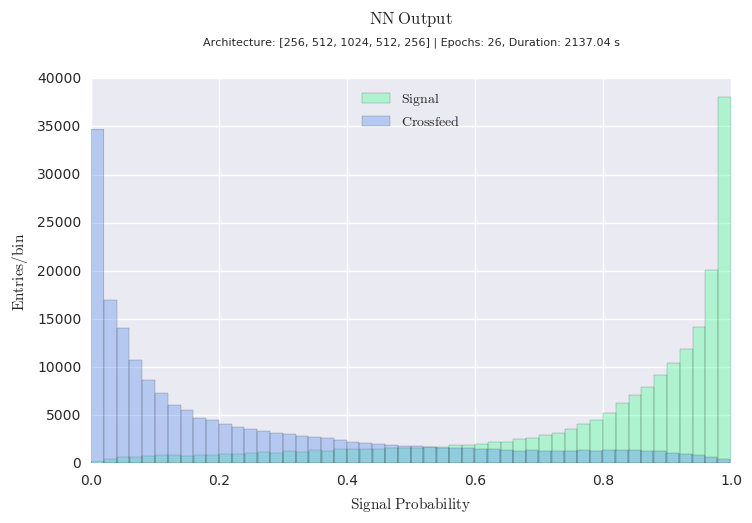

In [23]:
NN_output(network_output_train, y_train, meta = NN_meta)

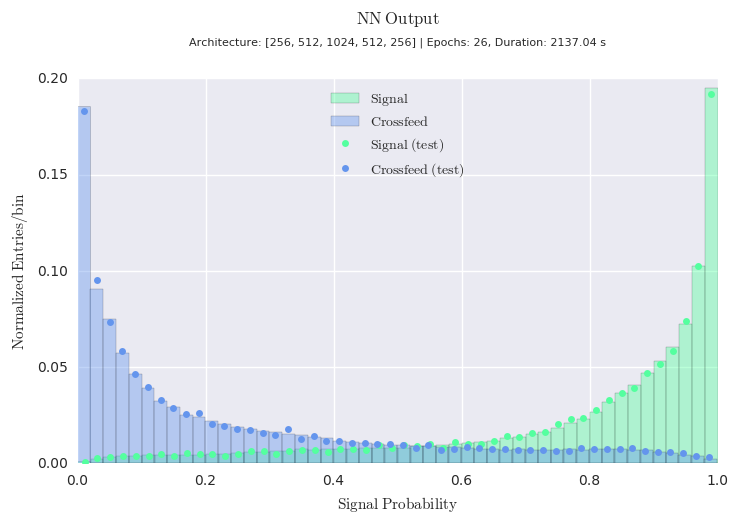

In [24]:
NN_output_train_test(network_output_test, network_output_train, y_test, y_train, meta = NN_meta)

### Receiver Operating Characteristic

The true positive rate (recall) is plotted against the false positive rate (probability of false alarm). Used to evaluate classifier performance as we vary its discrimination threshold. The BDT output is a continuous random variable $X$. Given a threshold parameter $T$, the instance is classified as signal is $X>T$ and background otherwise. The random variable $X$ should follow a probability density $f_{sig}(x)$ if is true signal, and $f_{bkg}(x)$ otherwise. The respective rates are therefore given as cumulative density functions:

$$ \mathbf{TPR}(T) = \int_T^{\infty} dx \; f_{sig}(x), \; \; \mathbf{FPR}(T) = \int_T^{\infty} dx \; f_{bkg}(x), $$ 

The ROC curve plots $\mathbf{TPR}(T)$ versus $\mathbf{FPR}(T)$ with the discrimination threshold as the varying parameter. The optimal point in ROC - space is $(0,1)$ in the upper left corner, which is the error-free point. The gradient and area of the ROC curve are also useful metrics. The latter will be used as a testing metric, and is given by:

$$ \mathrm{AUC} = \theta = \int_{-\infty}^{\infty} dT \; \mathbf{TPR}(T) \; \frac{d\; \mathbf{FPR}}{dT}(T) $$

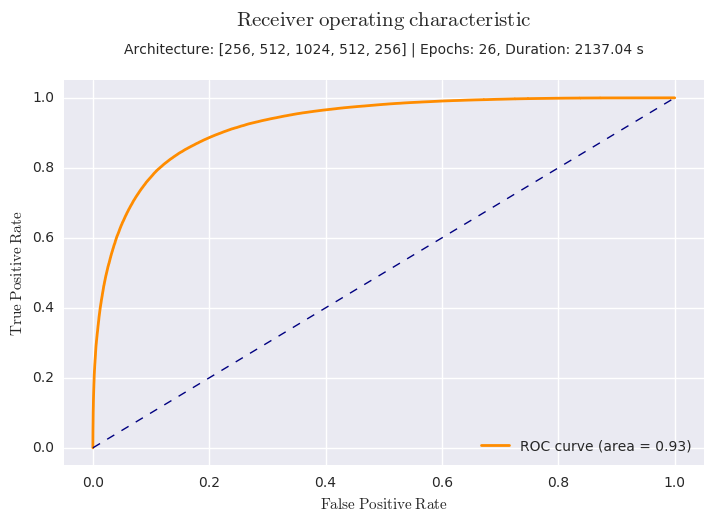

In [26]:
plot_ROC_curve(np.argmax(y_train,1), network_output_train[:1], meta = NN_meta)